<a href="https://colab.research.google.com/github/yuzc1121/test/blob/main/%E9%9B%BB%E4%BF%A1%E5%AE%A2%E6%88%B6%E6%B5%81%E5%A4%B1_%E8%A8%93%E7%B7%B4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
# Load 訓練用資料
```

In [ ]:
#載入訓練用資料
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/電信客戶流失/Telco_train.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
1,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
2,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,No
4,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


In [ ]:
#列出欄位名稱
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# 計算各欄位資料缺失狀況
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
class AutoPreprocess:
    def __init__(self):
        self.scaler = {}
        self.fillna_value = {}
        self.onehotencode_value = {}
        self.field_names = []
        self.final_field_names = []

    def fit(self, data, field_names):
        self.__init__()
        self.field_names = field_names

        for fname in field_names:
            #自動補空值
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                # self.fillna_value[fname] = data[fname].mode()[0] #補眾數
                self.fillna_value[fname] = 'np.nan'
                # self.fillna_value[fname] = np.nan # 維持空值
            elif data[fname].dtype == bool: #布林型態
                self.fillna_value[fname] = data[fname].mode()[0] #補眾數
            else: # 數字型態
                self.fillna_value[fname] = data[fname].median()  #補中位數

            #自動尺度轉換(scaling)
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位
                pass #不用轉換
            elif data[fname].dtype == bool: #布林型態
                pass #不用轉換
            else: # 數字型態
                vc = data[fname].value_counts()
                if data[fname].isin([0, 1]).all(): #當數值只有0跟1
                    pass #不用轉換
                elif pd.api.types.is_integer_dtype(data[fname]) and data[fname].nunique() <= 10: #是否簡單的整數型類別且數量小於10
                    self.scaler[fname] = MinMaxScaler()
                    self.scaler[fname].fit(data[[fname]])
                else: #其他的數字型態
                    self.scaler[fname] = StandardScaler()
                    self.scaler[fname].fit(data[[fname]])


            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                field_value = data[fname].value_counts().index
                self.onehotencode_value[fname] = field_value
                for value in field_value:
                    fn = fname+"_"+value
                    # data[fn] = (data[fname] == value).astype('int8')
                    self.final_field_names.append(fn)
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                # data[fname] = data[fname].astype(int)
                self.final_field_names.append(fname)
            else: # 數字型態 不用重新編碼
                self.final_field_names.append(fname)

        return

    def transform(self, data):
        #如果輸入的data是dict，要先轉成dataframe
        if isinstance(data, dict):
            for fname in self.field_names:
                if fname in data:
                    data[fname] = [data[fname]]
                else:
                    data[fname] = [np.nan]
            data = pd.DataFrame(data)
        else: #將資料複製一份，不修改原本的資料
            data = data.copy()

        for fname in self.field_names:
            #自動補空值
            if data[fname].isnull().any(): #有空值
                # if fname in self.fillna_value:
                    data[fname] = data[fname].fillna(self.fillna_value[fname])


            #自動尺度轉換(scaling)
            if fname in self.scaler:
                data[fname] = self.scaler[fname].transform(data[[fname]])

            #自動編碼
            if (data[fname].dtype == object) or (data[fname].dtype == str): #字串型態欄位, onehotencode
                if fname in self.onehotencode_value:
                    field_value = self.onehotencode_value[fname]
                for value in field_value:
                    fn = fname+"_"+value
                    data[fn] = (data[fname] == value).astype('int8')
            elif data[fname].dtype == bool: #布林型態 轉成0跟1
                data[fname] = data[fname].astype(int)
            else: # 數字型態 不用重新編碼
                pass
        return data[self.final_field_names]

    def save(self, file_name):
        with open(file_name, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(file_name):
        with open(file_name, "rb") as f:
            return pickle.load(f)

```python
# 前處理
## One-Hot Encoding
gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,
OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,
InternetService,Contract,PaymentMethod
## 標準化
MonthlyCharges,TotalCharges,tenure
```

In [ ]:
ap = AutoPreprocess()
ap.fit(data, ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])

ap.save("/content/drive/MyDrive/電信客戶流失/Telco_preprocess.bin")

X = ap.transform(data)
y = data['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
from sklearn.model_selection import train_test_split
# 分割資料成訓練組跟驗證組
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

In [ ]:
print(y_train.dtype)
print(y_train.unique())  # 查看所有唯一值

int64
[0 1]


訓練模型

# Regressor

In [ ]:
# 訓練模型
# from sklearn.neural_network import MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(200,), max_iter=200, random_state=42)

# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# 進行驗證集預測
y_valid_pred = model.predict(X_valid)

# 計算驗證集上的 MSE & R²
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

print(f"驗證集 - 均方誤差 (MSE): {mse_valid:.4f}")
print(f"驗證集 - R² (決定係數): {r2_valid:.4f}")


驗證集 - 均方誤差 (MSE): 0.1582
驗證集 - R² (決定係數): 0.1954


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 調整隨機森林模型參數
model = RandomForestRegressor(
    n_estimators=300,  # 增加樹的數量
    max_depth=15,  # 限制樹的最大深度
    min_samples_split=4,  # 降低過擬合
    min_samples_leaf=2,  # 降低過擬合
    random_state=42
)

# 重新訓練模型
model.fit(X_train, y_train)

# 再次驗證
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
r2_valid = r2_score(y_valid, y_valid_pred)

print(f"調整後的驗證集 - MSE: {mse_valid:.4f}, R²: {r2_valid:.4f}")


調整後的驗證集 - MSE: 0.1530, R²: 0.2221


# Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier()

# 訓練分類模型
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn import metrics

y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)
print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

print(metrics.classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.4301
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1030
           1       0.58      0.43      0.49       379

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409



# 加上參數 n_estimators=200, max_depth=10, random_state=42

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# 訓練分類模型
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))


驗證集 - Recall (召回率): 0.4512
分類報告:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1030
           1       0.61      0.45      0.52       379

    accuracy                           0.78      1409
   macro avg       0.71      0.67      0.69      1409
weighted avg       0.76      0.78      0.76      1409



# 增加 class_weight "balanced_subsample"

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced_subsample", random_state=42)

# 訓練分類模型
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))


驗證集 - Recall (召回率): 0.6675
分類報告:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1030
           1       0.56      0.67      0.61       379

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



# 降低 min_samples_split n_estimators=200, max_depth=10, min_samples_split=3, class_weight="balanced_subsample", random_state=42

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=3, class_weight="balanced_subsample", random_state=42)

# 訓練分類模型
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_split=3, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))


驗證集 - Recall (召回率): 0.6570
分類報告:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1030
           1       0.57      0.66      0.61       379

    accuracy                           0.77      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



# 增加Recall但1的 precision太差

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=150, max_depth=3, class_weight="balanced_subsample", random_state=1)

# 訓練分類模型
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                       n_estimators=150, random_state=1)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.7863
分類報告:
              precision    recall  f1-score   support

           0       0.90      0.70      0.78      1030
           1       0.49      0.79      0.60       379

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.73      1409



```python
1.驗證集 Recall (Churn=1) = 0.7863 → 很高，表示 能找到 78% 的流失客戶
2.Precision (Churn=1) = 0.49 → 偏低，表示 預測流失的客戶中，只有 49% 是真的流失
3.Accuracy = 0.72 → 下降了一些，但這是預期內的 trade-off
max_depth=3 太淺，導致模型過於簡單，無法有效區分 Churn=1 和 Churn=0
balanced_subsample 讓每棵樹在不同子集上計算權重，可能導致不穩定
n_estimators=150 樹的數量不夠多，可能影響模型穩定性
```

# Recall 要單獨高? 還是流失客戶值要平均?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=9, class_weight={0:1, 1:3}, random_state=1)

# 訓練分類模型
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=9, n_estimators=200,
                       random_state=1)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.6913
分類報告:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1030
           1       0.53      0.69      0.60       379

    accuracy                           0.75      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.75      0.76      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=9, class_weight={0:1, 1:2}, random_state=1)

# 訓練分類模型
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2}, max_depth=9, n_estimators=200,
                       random_state=1)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.6412
分類報告:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1030
           1       0.58      0.64      0.61       379

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



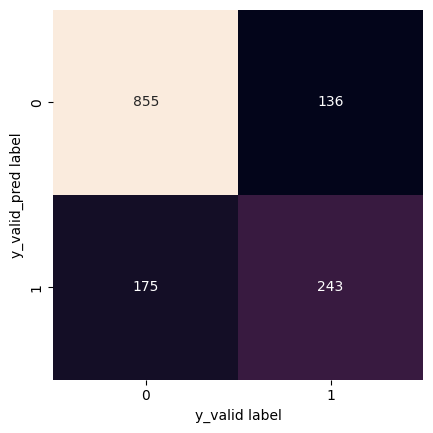

In [ ]:
# 測試結果的方陣圖
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('y_valid label')
plt.ylabel('y_valid_pred label');

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 初始化隨機森林分類器
model = RandomForestClassifier(n_estimators=200, max_depth=9, class_weight={0:1, 1:1.5}, random_state=1)

# 訓練分類模型
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.5}, max_depth=9,
                       n_estimators=200, random_state=1)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.5726
分類報告:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1030
           1       0.60      0.57      0.59       379

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



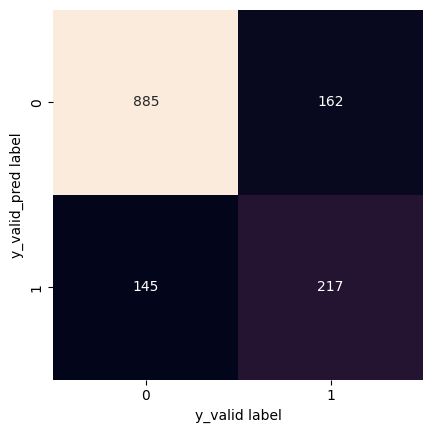

In [ ]:
# 測試結果的方陣圖
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('y_valid label')
plt.ylabel('y_valid_pred label');

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 讓 Churn=1 變成 50% 數量
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 重新訓練模型
model = RandomForestClassifier(n_estimators=200, max_depth=9, class_weight={0:1, 1:1.3}, random_state=1)
model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight={0: 1, 1: 1.3}, max_depth=9,
                       n_estimators=200, random_state=1)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, classification_report

# 預測驗證集
y_valid_pred = model.predict(X_valid)

# 計算 Recall
recall_valid = recall_score(y_valid, y_valid_pred)

print(f"驗證集 - Recall (召回率): {recall_valid:.4f}")

# 顯示完整分類報告
print("分類報告:")
print(classification_report(y_valid, y_valid_pred))

驗證集 - Recall (召回率): 0.6253
分類報告:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1030
           1       0.58      0.63      0.60       379

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



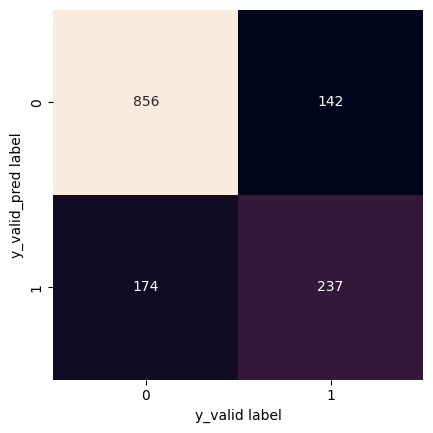

In [ ]:
# 測試結果的方陣圖
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_valid, y_valid_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('y_valid label')
plt.ylabel('y_valid_pred label');

In [ ]:
y_valid_probs = model.predict_proba(X_valid)[:, 1]  # 取得 Churn=1 的機率

threshold = 0.49  # 降低閾值，提高 Recall
y_valid_pred_adj = (y_valid_probs > threshold).astype(int)

# 重新評估 Precision 和 Recall
from sklearn.metrics import precision_score, recall_score

precision_adj = precision_score(y_valid, y_valid_pred_adj)
recall_adj = recall_score(y_valid, y_valid_pred_adj)

print(f"新閾值 = {threshold}")
print(f"新的 Precision: {precision_adj:.4f}")
print(f"新的 Recall: {recall_adj:.4f}")
print(classification_report(y_valid, y_valid_pred_adj))

新閾值 = 0.49
新的 Precision: 0.5735
新的 Recall: 0.6385
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1030
           1       0.57      0.64      0.60       379

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



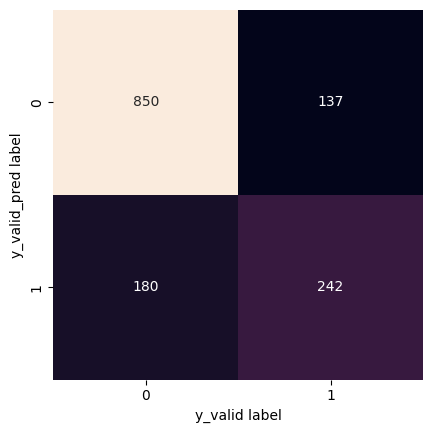

In [ ]:
# 測試結果的方陣圖
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_valid, y_valid_pred_adj)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('y_valid label')
plt.ylabel('y_valid_pred label');

# 決策數

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 初始化隨機森林分類器
model = DecisionTreeClassifier()

# 訓練分類模型
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics

y_valid_pred = model.predict(X_valid)

#算正確率看是不是True
y_valid_pred == y_valid

#檢查完算平均
(y_valid_pred == y_valid).mean()

# sklearn function metrics.accuracy_score
print('The accuracy is:', metrics.accuracy_score(y_valid_pred,y_valid))

The accuracy is: 0.7196593328601846


In [ ]:
#輸入欄位名稱
model.feature_names_in_

array(['gender_Male', 'gender_Female', 'SeniorCitizen', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'tenure',
       'PhoneService_Yes', 'PhoneService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'MultipleLines_No phone service',
       'InternetService_Fiber optic', 'InternetService_DSL',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineSecurity_No internet service', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineBackup_No internet service',
       'DeviceProtection_No', 'DeviceProtection_Yes',
       'DeviceProtection_No internet service', 'TechSupport_No',
       'TechSupport_Yes', 'TechSupport_No internet service',
       'StreamingTV_No', 'StreamingTV_Yes',
       'StreamingTV_No internet service', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'StreamingMovies_No internet service',
       'Contract_Month-to-month', 'Contract_Two year',
       'Contract_One year', 'PaperlessBilling_Yes', 'PaperlessB

In [ ]:
list(model.feature_names_in_)

['gender_Male',
 'gender_Female',
 'SeniorCitizen',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'tenure',
 'PhoneService_Yes',
 'PhoneService_No',
 'MultipleLines_No',
 'MultipleLines_Yes',
 'MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_DSL',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'OnlineBackup_No internet service',
 'DeviceProtection_No',
 'DeviceProtection_Yes',
 'DeviceProtection_No internet service',
 'TechSupport_No',
 'TechSupport_Yes',
 'TechSupport_No internet service',
 'StreamingTV_No',
 'StreamingTV_Yes',
 'StreamingTV_No internet service',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'StreamingMovies_No internet service',
 'Contract_Month-to-month',
 'Contract_Two year',
 'Contract_One year',
 'PaperlessBilling_Yes',
 'PaperlessBilling_No',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed che

In [ ]:
#輸出類別名稱
model.classes_

array([0, 1])

In [ ]:
#輸入欄位的重要性
model.feature_importances_

array([0.01412123, 0.0164494 , 0.01845604, 0.00762902, 0.01181455,
       0.00332936, 0.00860185, 0.09032718, 0.0035318 , 0.00045822,
       0.01077971, 0.0056907 , 0.00097754, 0.05211882, 0.        ,
       0.        , 0.00839156, 0.01055797, 0.        , 0.01227638,
       0.00717158, 0.        , 0.00748833, 0.00653933, 0.        ,
       0.02052302, 0.00535123, 0.        , 0.00758626, 0.00279699,
       0.        , 0.00847809, 0.01121274, 0.        , 0.17426566,
       0.00220023, 0.00282149, 0.00995381, 0.01047971, 0.01705203,
       0.00761669, 0.00450118, 0.00856137, 0.18284764, 0.2270413 ])

In [ ]:
# 決策樹可視覺化
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_34 <= 0.50
|   |--- feature_43 <= 1.16
|   |   |--- feature_36 <= 0.50
|   |   |   |--- feature_39 <= 0.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- feature_19 <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_19 >  0.50
|   |   |   |   |   |   |--- feature_43 <= 0.33
|   |   |   |   |   |   |   |--- feature_43 <= 0.32
|   |   |   |   |   |   |   |   |--- feature_44 <= 1.08
|   |   |   |   |   |   |   |   |   |--- feature_42 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_42 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_44 >  1.08
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |

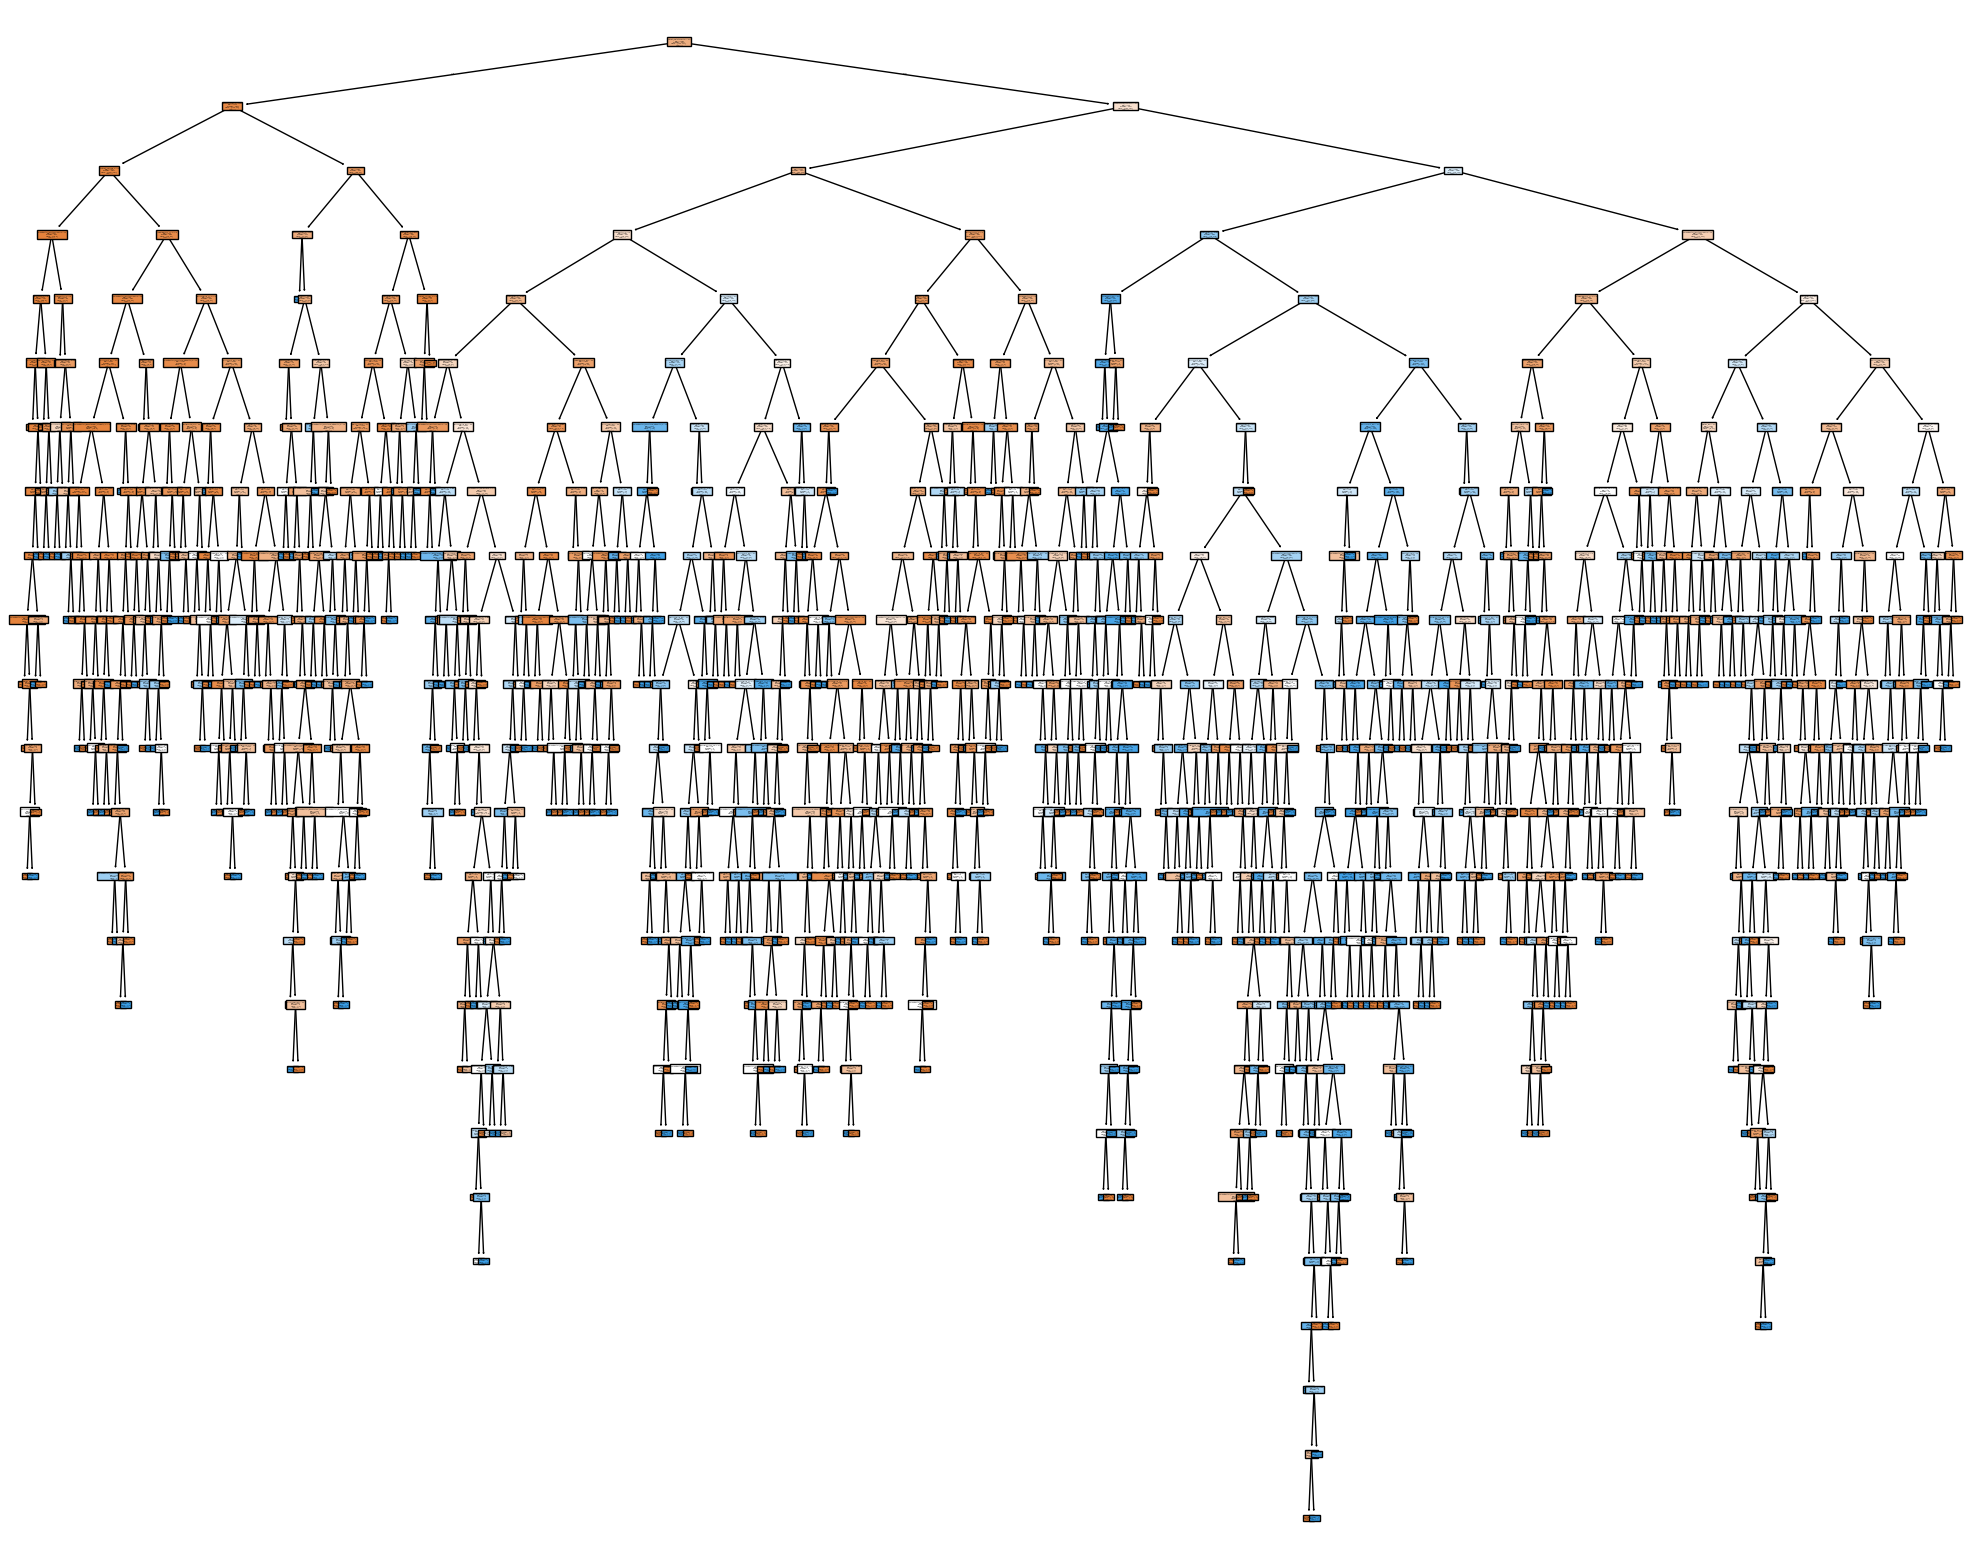

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

# 轉換特徵名稱和類別名稱為字串
feature_names = [str(f) for f in model.feature_names_in_]
class_names = [str(c) for c in model.classes_]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=feature_names,
                   class_names=class_names,
                   filled=True)
plt.show()